In [1]:
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.validation import check_is_fitted
from sklearn.exceptions import NotFittedError
from urllib.request import urlopen 

#from sklearn.datasets import make_regression
#from sklearn.preprocessing import StandardScaler
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.optimizers import SGD


plt.style.use('ggplot')
pd.set_option('display.max_columns', 500)

In [2]:
train_values = pd.read_csv("/Users/shubhambhardwaj/Desktop/Data_Science/Driven_data/Train_Values.csv")

In [3]:
train_labels = pd.read_csv("/Users/shubhambhardwaj/Desktop/Data_Science/Driven_data/Train_Labels.csv")

In [4]:
test_values = pd.read_csv("/Users/shubhambhardwaj/Desktop/Data_Science/Driven_data/Test_Values.csv") 

In [5]:
submit_result = pd.DataFrame(columns=['patient_id', 'heart_disease_present'])

In [6]:
submit_result['patient_id'] = test_values['patient_id']

In [7]:
#submit_result.set_index(['patient_id'], inplace = True)

In [8]:
submit_result.head()

,patient_id,heart_disease_present
0,olalu7,NaN
1,z9n6mx,NaN
2,5k4413,NaN
3,mrg7q5,NaN
4,uki4do,NaN


In [9]:
heart_disease = pd.merge(train_values, train_labels, on='patient_id')

In [10]:
test_values.set_index(['patient_id'], inplace = True)
train_values.set_index(['patient_id'], inplace = True)
train_labels.set_index(['patient_id'], inplace = True)
heart_disease.set_index(['patient_id'], inplace = True)

In [11]:
train_values.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
patient_id,,,,,,,,,,,,,
0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [12]:
train_labels.head()

,heart_disease_present
patient_id,
0z64un,0
ryoo3j,0
yt1s1x,1
l2xjde,1
oyt4ek,0


In [13]:
test_values.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
patient_id,,,,,,,,,,,,,
olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


In [14]:
test_values['thal'] = test_values['thal'].map({'normal':0, 'reversible_defect':1, 'fixed_defect':2})
train_values['thal'] = train_values['thal'].map({'normal':0, 'reversible_defect':1, 'fixed_defect':2})
heart_disease['thal'] = heart_disease['thal'].map({'normal':0, 'reversible_defect':1, 'fixed_defect':2})

In [15]:
heart_disease.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
patient_id,,,,,,,,,,,,,,
0z64un,1,0,128,2,0,0,2,308,0.0,1,45,170,0,0
ryoo3j,2,0,110,3,0,0,0,214,1.6,0,54,158,0,0
yt1s1x,1,0,125,4,3,0,2,304,0.0,1,77,162,1,1
l2xjde,1,1,152,4,0,0,0,223,0.0,1,40,181,0,1
oyt4ek,3,1,178,1,0,0,2,270,4.2,1,59,145,0,0


In [16]:
print("Here's the dimensions of our data frame:\n", 
     heart_disease.shape)
print("Here's the data types of our columns:\n",
     heart_disease.dtypes)

Here's the dimensions of our data frame:
 (180, 14)
Here's the data types of our columns:
 slope_of_peak_exercise_st_segment         int64
thal                                      int64
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
heart_disease_present                     int64
dtype: object


In [17]:
print("Here's the dimensions of our data frame:\n", 
     test_values.shape)
print("Here's the data types of our columns:\n",
     test_values.dtypes)

Here's the dimensions of our data frame:
 (90, 13)
Here's the data types of our columns:
 slope_of_peak_exercise_st_segment         int64
thal                                      int64
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
dtype: object


In [18]:
heart_disease.apply(lambda x: x.isnull().values.ravel().sum())

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [19]:
def print_dx_perc(data_frame, col):
    """Function used to print class distribution for our data set"""
    try:
        # Stores value counts
        col_vals = data_frame[col].value_counts()
        # Resets index to make index a column in data frame
        col_vals = col_vals.reset_index()
        # If the number of unique instances in column exceeds 20 print warning
        if len(col_vals['index']) > 20:
            print('Warning: values in column are more than 20 \nPlease try a column with lower value counts!')
        # Else it calculates/prints percentage for each unique value in column
        else:
            # Create a function to output the percentage
            f = lambda x, y: 100 * (x / sum(y))
            for i in range(0, len(col_vals['index'])):
                print('{0} accounts for {1:.2f}% of the {2} column'\
                      .format(col_vals['index'][i],
                              f(col_vals[col].iloc[i],
                                col_vals[col]),
                              col))
    # try-except block goes here if it can't find the column in data frame
    except KeyError as e:
        print('{0}: Not found'.format(e))
        print('Please choose the right column name!')


In [20]:
print_dx_perc(heart_disease, 'heart_disease_present')

0 accounts for 55.56% of the heart_disease_present column
1 accounts for 44.44% of the heart_disease_present column


In [2]:
feature_space = heart_disease.iloc[:, heart_disease.columns != 'heart_disease_present']
feature_class = heart_disease.iloc[:, heart_disease.columns == 'heart_disease_present']


training_set, test_set, train_class_set, test_class_set = train_test_split(feature_space,
                                                                    feature_class,
                                                                    test_size = 0.20, 
                                                                    random_state = 42)

NameError: name 'heart_disease' is not defined

In [1]:
training_set.head()

NameError: name 'training_set' is not defined

In [23]:
# Cleaning test sets to avoid future warning messages
train_class_set = train_class_set.values.ravel() 
test_class_set = test_class_set.values.ravel()

In [24]:
#training_set = training_set.values.ravel() 
#test_set = test_set.values.ravel()

In [25]:
#test_class_set.head()

In [26]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=42)

In [27]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(training_set, train_class_set)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto'}
Time taken in grid search:  7.34


/Users/shubhambhardwaj/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/shubhambhardwaj/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [28]:
# Set best parameters given by grid search 
fit_rf.set_params(bootstrap = False,
                  criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 2)



RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [29]:
fit_rf.fit(training_set, train_class_set)

/Users/shubhambhardwaj/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [30]:
def variable_importance(fit):
    """
    Purpose
    ----------
    Checks if model is fitted CART model then produces variable importance
    and respective indices in dictionary.

    Parameters
    ----------
    * fit:  Fitted model containing the attribute feature_importances_

    Returns
    ----------
    Dictionary containing arrays with importance score and index of columns
    ordered in descending order of importance.
    """
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}


In [31]:
var_imp_rf = variable_importance(fit_rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']

In [32]:
features=['slope_of_peak_exercise_st_segment',
          'fasting_blood_sugar_gt_120_mg_per_dl',
          'num_major_vessels',
          'thal',
          'oldpeak_eq_st_depression',
          'exercise_induced_angina',
          'chest_pain_type',
          'max_heart_rate_achieved',
          'resting_blood_pressure',
          'age',
          'resting_ekg_results',
          'serum_cholesterol_mg_per_dl',
          'sex'
          ]


In [33]:
def print_var_importance(importance, indices, features):
    """
    Purpose
    ----------
    Prints dependent variable names ordered from largest to smallest
    based on information gain for CART model.
    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns
    ----------
    Prints feature importance in descending order
    """
    print("Feature ranking:")

    for f in range(0, indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      features[indices[i]],
                      importance[indices[f]]))

In [34]:
print_var_importance(importances_rf, indices_rf, features)           


Feature ranking:
1. The feature 'fasting_blood_sugar_gt_120_mg_per_dl' has a Mean Decrease in Impurity of 0.30403
2. The feature 'oldpeak_eq_st_depression' has a Mean Decrease in Impurity of 0.21498
3. The feature 'thal' has a Mean Decrease in Impurity of 0.15708
4. The feature 'sex' has a Mean Decrease in Impurity of 0.15448
5. The feature 'resting_blood_pressure' has a Mean Decrease in Impurity of 0.06367
6. The feature 'slope_of_peak_exercise_st_segment' has a Mean Decrease in Impurity of 0.04329
7. The feature 'chest_pain_type' has a Mean Decrease in Impurity of 0.02432
8. The feature 'resting_ekg_results' has a Mean Decrease in Impurity of 0.01987
9. The feature 'max_heart_rate_achieved' has a Mean Decrease in Impurity of 0.01055
10. The feature 'serum_cholesterol_mg_per_dl' has a Mean Decrease in Impurity of 0.00774
11. The feature 'age' has a Mean Decrease in Impurity of 0.00000
12. The feature 'exercise_induced_angina' has a Mean Decrease in Impurity of 0.00000
13. The feature 

In [35]:
def variable_importance_plot(importance, indices, features):
    """
    Purpose
    ----------
    Prints bar chart detailing variable importance for CART model
    NOTE: feature_space list was created because the bar chart
    was transposed and index would be in incorrect order.

    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns:
    ----------
    Returns variable importance plot in descending order
    """
    index = np.arange(len(features))

    importance_desc = sorted(importance)
    feature_space = []
    for i in range(indices.shape[0] - 1, -1, -1):
        feature_space.append(features[indices[i]])

    fig, ax = plt.subplots(figsize=(10, 10))

    ax.set_facecolor('#fafafa')
    plt.title('Feature importances for Random Forest Model\
    \nHeart Disease')
    plt.barh(index,
             importance_desc,
             align="center",
             color = '#875FDB')
    plt.yticks(index,
               feature_space)

    plt.ylim(-1, 13)
    plt.xlim(0, max(importance_desc) + 0.01)
    plt.xlabel('Mean Decrease in Impurity')
    plt.ylabel('Feature')

    plt.show()
    plt.close()


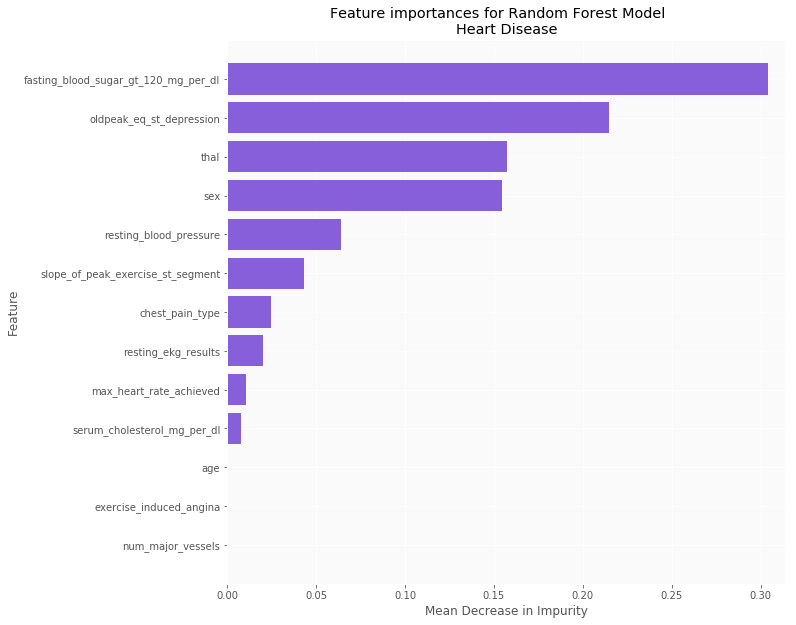

In [36]:
variable_importance_plot(importances_rf, indices_rf, features)

In [37]:
fit_rf.fit(training_set, train_class_set)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [38]:
def cross_val_metrics(fit, training_set, class_set, estimator, print_results = True):
    """
    Purpose
    ----------
    Function helps automate cross validation processes while including 
    option to print metrics or store in variable

    Parameters
    ----------
    fit: Fitted model 
    training_set:  Data_frame containing 80% of original dataframe
    class_set:     data_frame containing the respective target vaues 
                      for the training_set
    print_results: Boolean, if true prints the metrics, else saves metrics as 
                      variables

    Returns
    ----------
    scores.mean(): Float representing cross validation score
    scores.std() / 2: Float representing the standard error (derived
                from cross validation score's standard deviation)
    """
    my_estimators = {
    'rf': 'estimators_',
    'nn': 'out_activation_',
    'knn': '_fit_method'
    }
    try:
        # Captures whether first parameter is a model
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)[my_estimators[estimator]]:
            return print("Model does not appear to be trained.")

    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    n = KFold(n_splits=10)
    scores = cross_val_score(fit, 
                         training_set, 
                         class_set, 
                         cv = n)
    if print_results:
        for i in range(0, len(scores)):
            print("Cross validation run {0}: {1: 0.3f}".format(i, scores[i]))
        print("Accuracy: {0: 0.3f} (+/- {1: 0.3f})"\
              .format(scores.mean(), scores.std() / 2))
    else:
        return scores.mean(), scores.std() / 2



In [39]:
cross_val_metrics(fit_rf, 
                  training_set, train_class_set,
                  'rf',
                  print_results = True)

Cross validation run 0:  0.800
Cross validation run 1:  0.600
Cross validation run 2:  0.867
Cross validation run 3:  0.800
Cross validation run 4:  0.786
Cross validation run 5:  0.714
Cross validation run 6:  0.929
Cross validation run 7:  0.857
Cross validation run 8:  0.714
Cross validation run 9:  1.000
Accuracy:  0.807 (+/-  0.054)


In [40]:
predictions_rf = fit_rf.predict(test_set)
#predictions_rf#[:,1]

In [41]:
def create_conf_mat(test_class_set, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set,
                                        columns = predictions)
        test_crosstb = test_crosstb_comp.as_matrix()
        return test_crosstb

/Users/shubhambhardwaj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


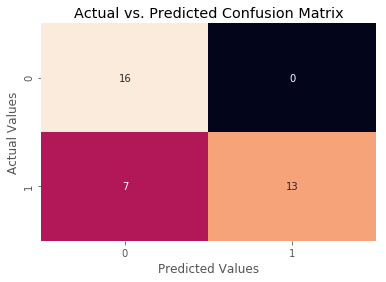

In [42]:
conf_mat = create_conf_mat(test_class_set, predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

Now implementing the model on train values and train labels

In [43]:
fit_rf.fit(train_values, train_labels)

/Users/shubhambhardwaj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [46]:
final_prediction = fit_rf.predict_proba(test_values)[:,1]

In [48]:
submit_result['heart_disease_present'] = final_prediction

In [50]:
submission = submit_result[['patient_id','heart_disease_present']]
submission.to_csv('/Users/shubhambhardwaj/Desktop/Data_Science/Driven_data/submission.csv', index=False)

Using Keras for loss function

model = Sequential()
model.add(Dense(50, input_dim=13, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])


history = model.fit(training_set, train_class_set, validation_data=(test_set, test_class_set), epochs=100, verbose=0)


# evaluate the model
train_mse = model.evaluate(training_set, train_class_set, verbose=0)
test_mse = model.evaluate(training_set, train_class_set, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))


# plot loss during training training_set, test_set, train_class_set, test_class_set
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()